In [164]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the dataset

### The main objective is to create robust machine learning algorithem for spam dectection.

In [165]:
df=pd.read_csv('spam.tsv',sep='\t')

In [166]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [167]:
df.shape

(5572, 4)

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


# Preprocessing the dataset

In [144]:
# Checking Null data

In [169]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [146]:
# Checking Duplicates

#def check_dup(df):
#    if df.duplicated().any()==True:
#        print('duplicates are found',df.duplicated().sum())
#        df.drop_duplicates(inplace=True, keep='last')
#        df=df.reset_index(drop=True)
##        print('checking dulicates after Dropped duplicates:',df.duplicated().sum())
#            
#    else:
#        return('No duplicates are found')
#check_dup(df)

# checking imbalance dataset

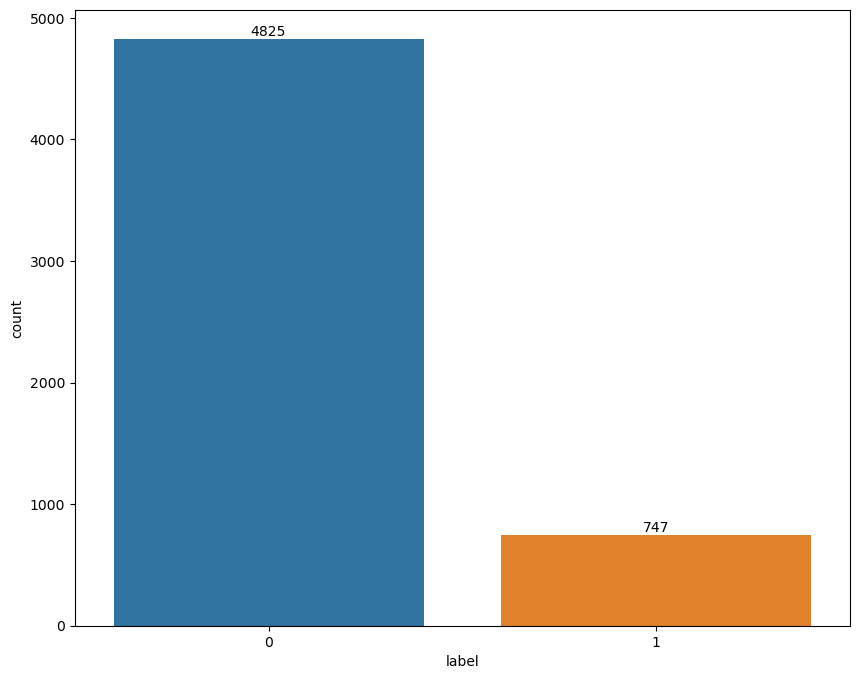

In [219]:
plt.figure(figsize=(10,8))
ax=sns.countplot(x=df['label'],data=df)
for i in ax.containers:
    ax.bar_label(i)

plt.show()

- Data imbalance is observed

# Feature Engineering

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


In [172]:
from sklearn.preprocessing import LabelEncoder
sc=LabelEncoder()

df['label']=sc.fit_transform(df['label'])

# Text Preprocessing using NLTK

In [173]:
#Data cleaning and preprocessing
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [174]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [175]:
corups=[]
for i in range(0,len(df)):
    review=re.sub('[^a-zA-Z]',' ',df['message'][i])
    review=review.lower()
    review=review.split()
                   
                   
    review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corups.append(review)

In [153]:
corups

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

In [177]:
df['Processed_text']=corups

In [178]:
df

,label,message,length,punct,Processed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,9,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,6,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,6,free entri wkli comp win fa cup final tkt st m...
3,0,U dun say so early hor... U c already then say...,49,6,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,2,nah think goe usf live around though
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,8,nd time tri contact u u pound prize claim easi...
5568,0,Will ü b going to esplanade fr home?,36,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,7,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,1,guy bitch act like interest buy someth els nex...


In [182]:
from wordcloud import WordCloud
wc = WordCloud(width=800,
               height=400,
               min_font_size=2,
               #max_font_size=100,
               min_word_length=3,
               max_words=100,               
               background_color='white')

In [183]:
wc_ham=wc.generate(df[df['label']==0]['Processed_text'].str.cat(sep= " "))

# Words in ham messages - Words in spam messages

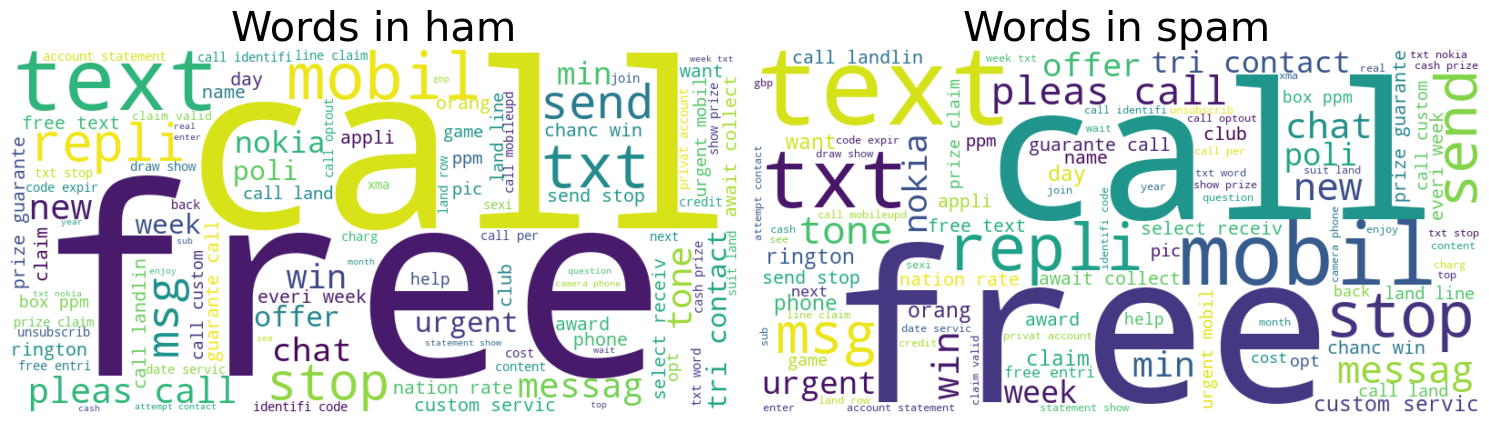

In [197]:
plt.figure(figsize=(15, 8))

plt.subplot(1,2,1)
plt.imshow(wc_ham, interpolation='bilinear')
plt.axis('off')
plt.title('Words in ham',fontsize=30)

wc_spam=wc.generate(df[df['label']==1]['Processed_text'].str.cat(sep= " "))
                   
plt.subplot(1,2,2)
plt.imshow(wc_spam, interpolation='bilinear')
plt.axis('off')
plt.title('Words in spam',fontsize=30)
plt.tight_layout()
plt.show()


# Model Building

In [200]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve,auc

In [201]:
## First of all We have to Convert Our SMS text to Vectors Using Bag of Words Technique

In [202]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X=cv.fit_transform(df['Processed_text']).toarray()

In [226]:
Y=df['label']

# Splitting into train and Test

In [237]:
x_train,x_test,y_train,y_test=train_test_split(X_sampled,Y_sampled,test_size=0.25,random_state=42)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(7237, 6296) (2413, 6296) (7237,) (2413,)


In [233]:
from imblearn.over_sampling import SMOTE
from collections import Counter

X_sampled,Y_sampled=SMOTE().fit_resample(X,Y)
print(X_sampled.shape,Y_sampled.shape)

value_counts=Counter(Y_sampled)
print(value_counts)

(9650, 6296) (9650,)
Counter({0: 4825, 1: 4825})


# Models

In [229]:
gnb=GaussianNB()
bnb=BernoulliNB()
mnb=MultinomialNB()

models=[('GaussianNB',gnb),
         ('BernoulliNB',bnb),
         ('MultinomialNB',mnb),]
       
from tabulate import tabulate

print(tabulate(models,headers=['Model name','Sklearn Models']))

Model name     Sklearn Models
-------------  ----------------
GaussianNB     GaussianNB()
BernoulliNB    BernoulliNB()
MultinomialNB  MultinomialNB()


In [239]:
from sklearn.metrics import classification_report,f1_score,confusion_matrix
for model_name, model in models:
    model.fit(x_train,y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    print('==='*10)
    print(model_name)
    print('==='*10)
    print(classification_report(y_test,y_pred_test))
    print('F1 score:',f1_score(y_test,y_pred_test))

GaussianNB
              precision    recall  f1-score   support

           0       0.99      0.88      0.93      1240
           1       0.88      0.99      0.93      1173

    accuracy                           0.93      2413
   macro avg       0.94      0.93      0.93      2413
weighted avg       0.94      0.93      0.93      2413

F1 score: 0.9326884320838371
BernoulliNB
              precision    recall  f1-score   support

           0       0.86      0.98      0.91      1240
           1       0.97      0.83      0.89      1173

    accuracy                           0.90      2413
   macro avg       0.92      0.90      0.90      2413
weighted avg       0.91      0.90      0.90      2413

F1 score: 0.8939114391143912
MultinomialNB
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1240
           1       0.97      0.98      0.98      1173

    accuracy                           0.98      2413
   macro avg       0.98      0.98

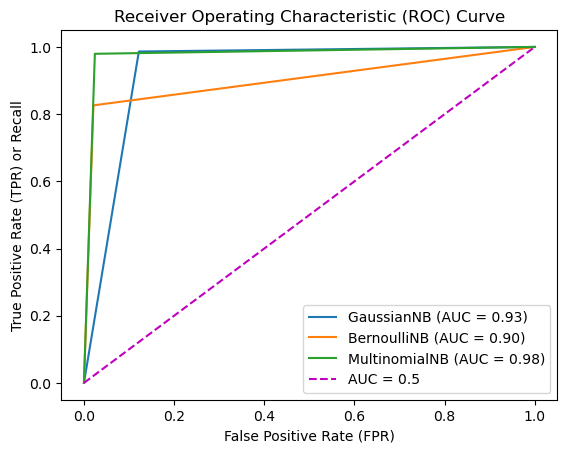

In [241]:
for model_name, model in models:
    model.fit(x_train,y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred_test)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    
  
 
plt.plot([0, 1], [0, 1], 'm--', label='AUC = 0.5')

# Set labels and title
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) or Recall')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Show the plot
plt.show()

## Observation 

- Navie bays MultinomialNB algorithem given very good prediction.